In [1]:
%matplotlib inline


# Watershed segmentation

The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats
pixels values as a local topography (elevation). The algorithm floods
basins from the markers until basins attributed to different markers
meet on watershed lines.  In many cases, markers are chosen as local
minima of the image, from which basins are flooded.

In the example below, two overlapping circles are to be separated. To
do so, one computes an image that is the distance to the
background. The maxima of this distance (i.e., the minima of the
opposite of the distance) are chosen as markers and the flooding of
basins from such markers separates the two circles along a watershed
line.

See Wikipedia_ for more details on the algorithm.



C:\Users\omid\.conda\envs\myenv\lib\site-packages\matplotlib\image.py:449: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\omid\.conda\envs\myenv\lib\site-packages\matplotlib\image.py:454: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
C:\Users\omid\.conda\envs\myenv\lib\site-packages\matplotlib\image.py:506: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
C:\Users\omid\.conda\envs\myenv\lib\site-packages\matplotlib\image.py:507: RuntimeWarning: invalid value encountered in multiply
  vrange *= ((a_max - a_min) / frac)


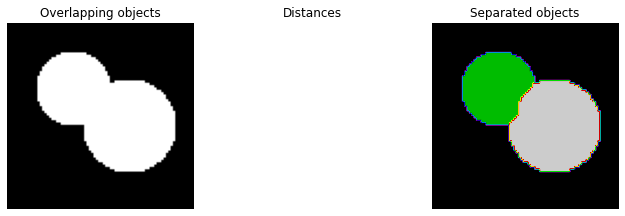

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()